In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import matplotlib as mp

In [2]:
data = pd.read_csv("C:\\Users\\jacob\\Documents\\Projects\\Claudio Case Studies\\Case #1\\Data\\Ex_Files_Customer_Insights_Tools_Analysis\\Exercise Files\\data\\ci-data.csv")

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 400 non-null    object 
 1   purchase_counts                    400 non-null    int64  
 2   purchase_sum                       400 non-null    float64
 3   attribution_score                  400 non-null    int64  
 4   website_visits                     400 non-null    int64  
 5   website_behavior_classification    400 non-null    int64  
 6   experience                         400 non-null    float64
 7   active                             400 non-null    float64
 8   characteristic_one                 400 non-null    int64  
 9   characteristic_two                 400 non-null    int64  
 10  characteristic_three               400 non-null    int64  
 11  customer_journey_progress_program  400 non-null    int64  

c:\Users\jacob\Documents\Projects\Claudio Case Studies\Case #1\env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
c:\Users\jacob\Documents\Projects\Claudio Case Studies\Case #1\env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
c:\Users\jacob\Documents\Projects\Claudio Case Studies\Case #1\env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
c:\Users\jacob\Documents\Projects\Claudio Case Studies\Case #1\env\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warni

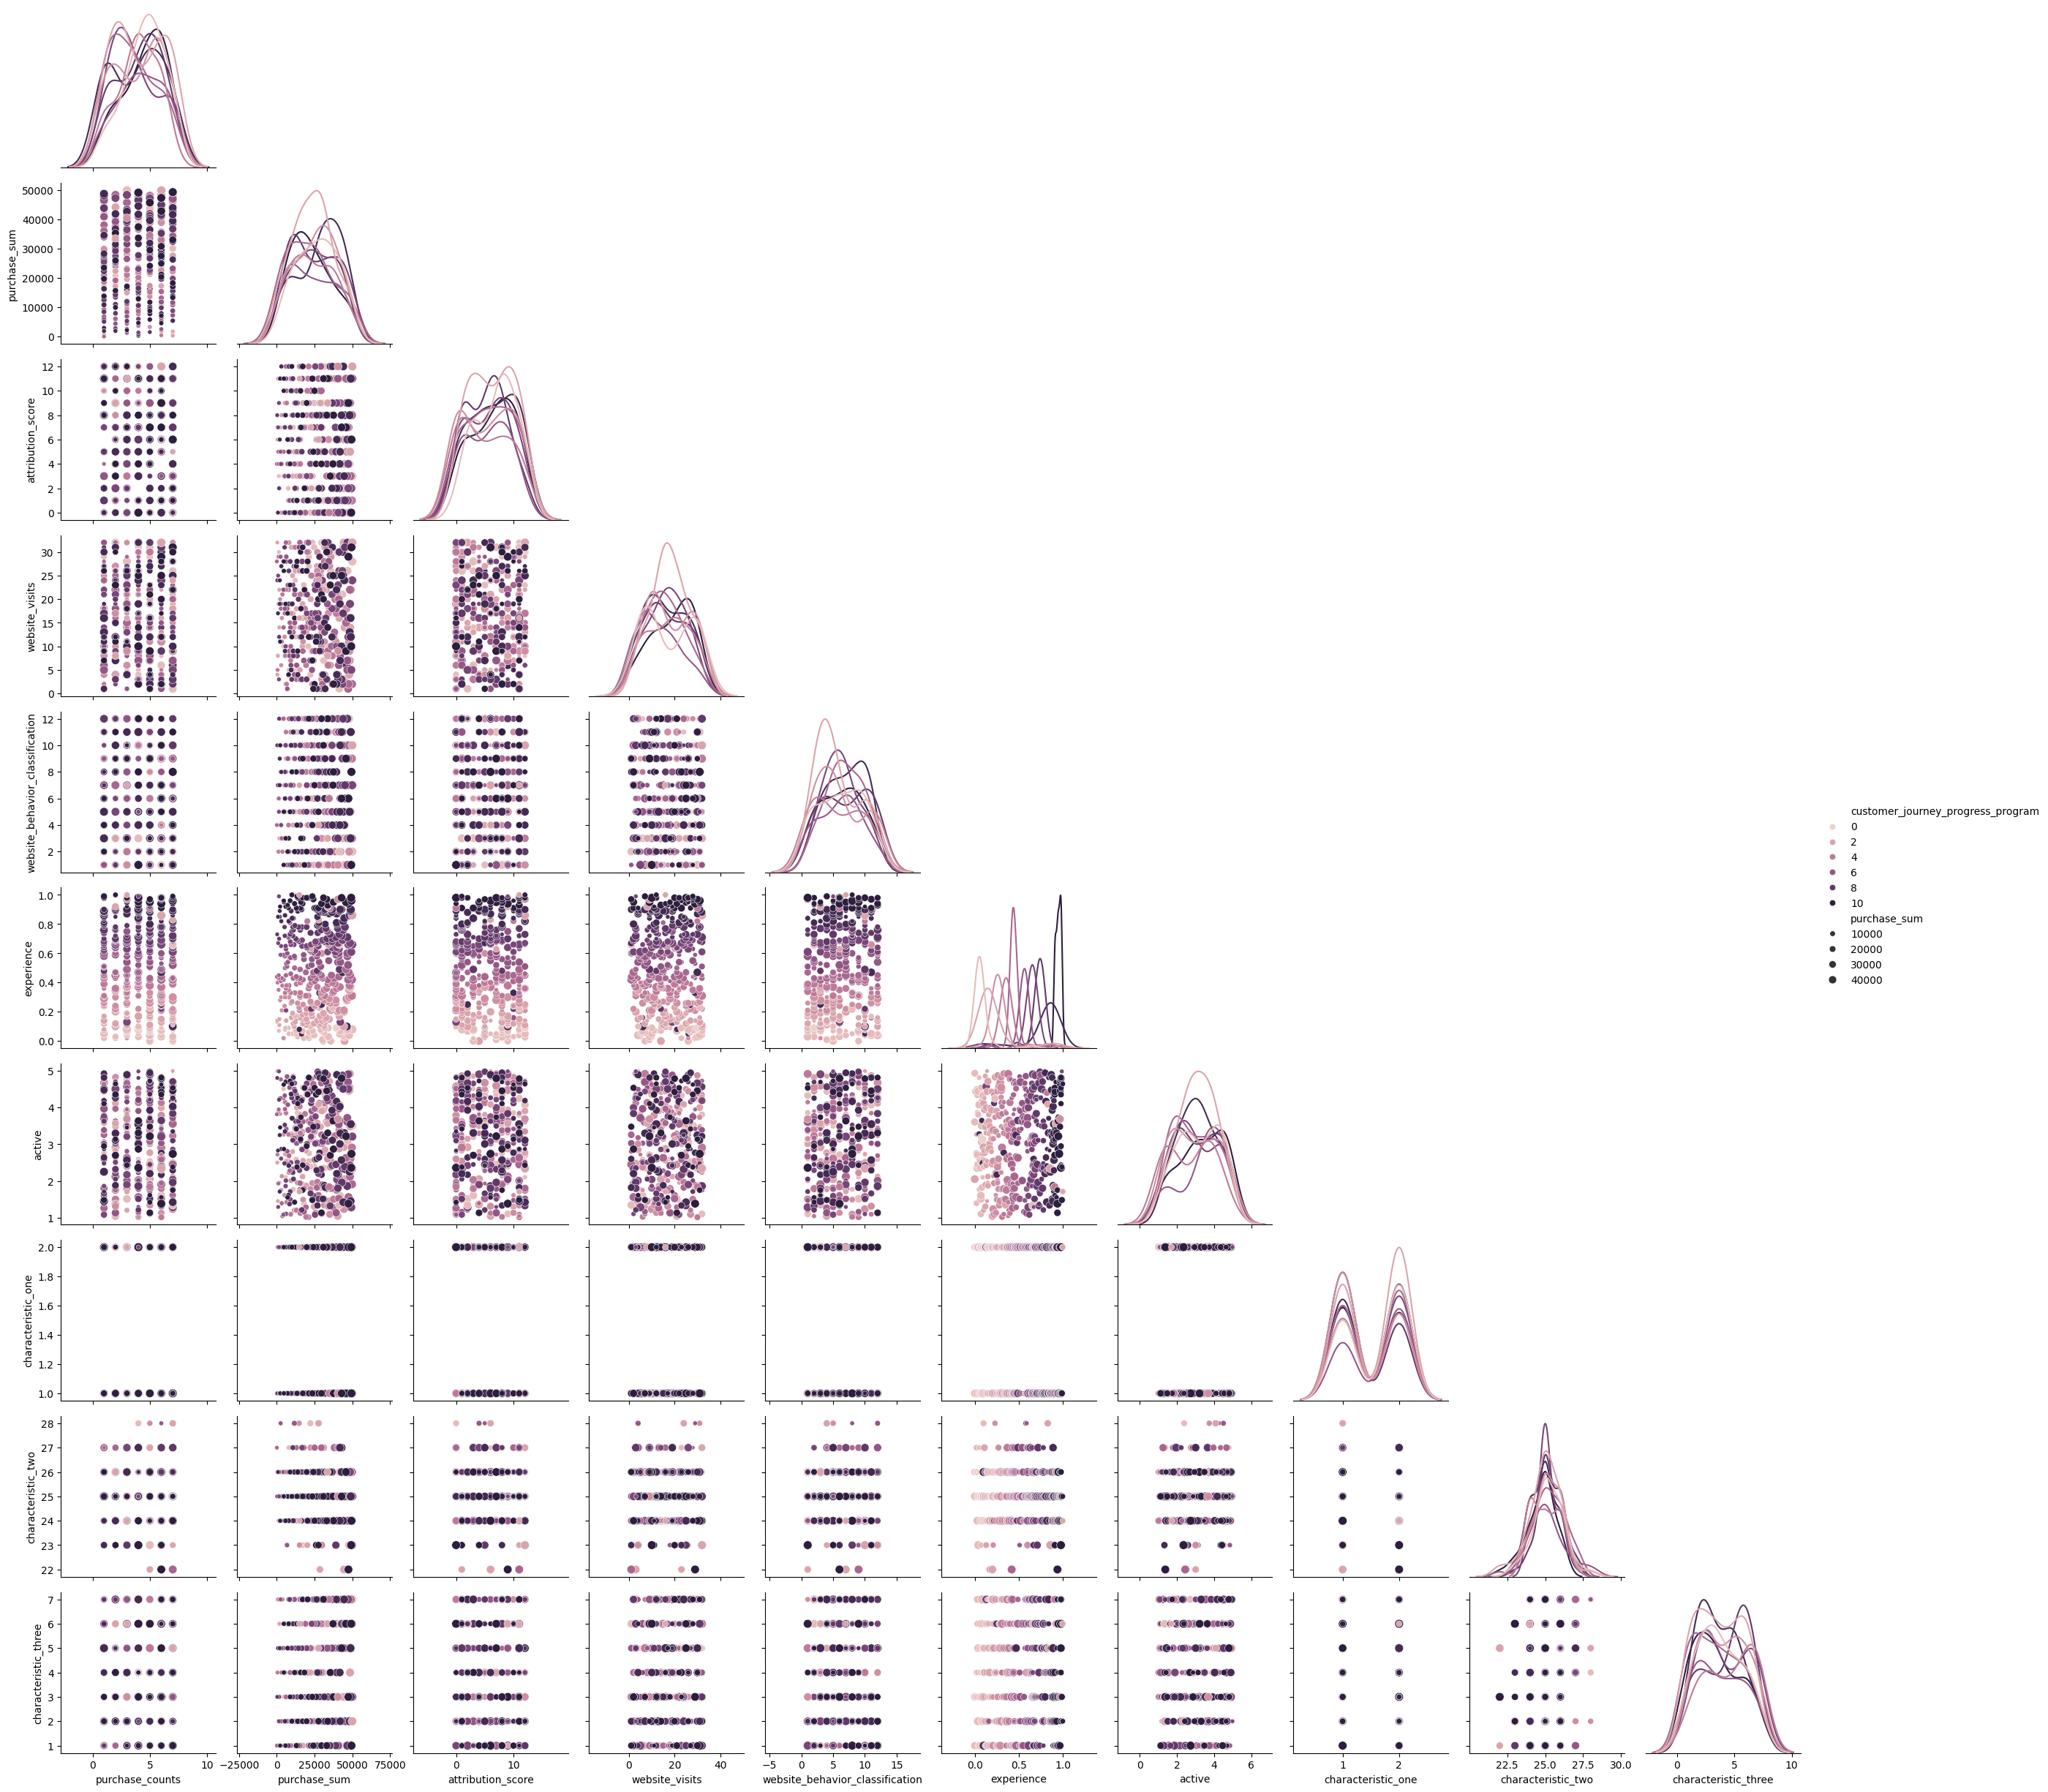

In [4]:
g = sns.PairGrid(data, diag_sharey=False, hue="customer_journey_progress_program", corner=True)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot, size=data["purchase_sum"])
g.add_legend(title="", adjust_subtitles=True)

In [5]:
numerics = data.select_dtypes(include=np.number)

In [6]:
numerics.head()

,purchase_counts,purchase_sum,attribution_score,website_visits,website_behavior_classification,experience,active,characteristic_one,characteristic_two,characteristic_three,customer_journey_progress_program
0,5,44810.57,4,14,5,0.00,2.05,1,25,3,2
1,5,30612.91,9,7,9,0.00,4.94,2,25,3,1
2,7,35655.59,3,26,5,0.00,3.61,1,26,1,1
3,7,30139.24,7,9,4,0.01,4.44,2,26,3,1
4,4,4501.13,3,10,1,0.02,4.51,1,25,3,1


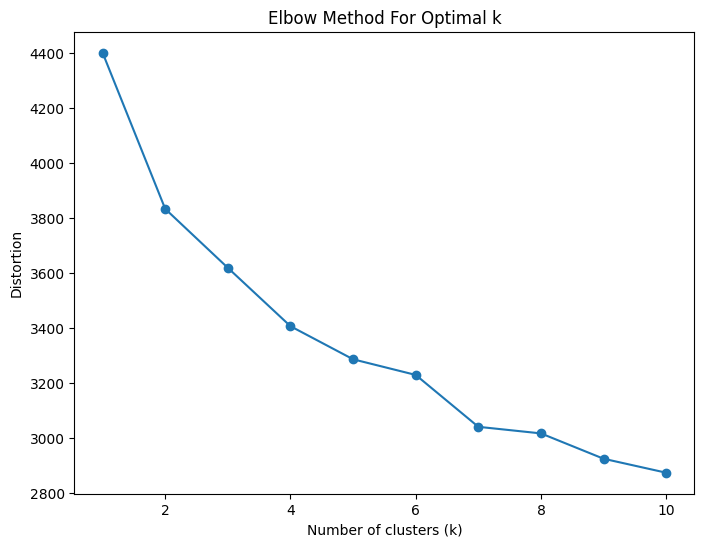

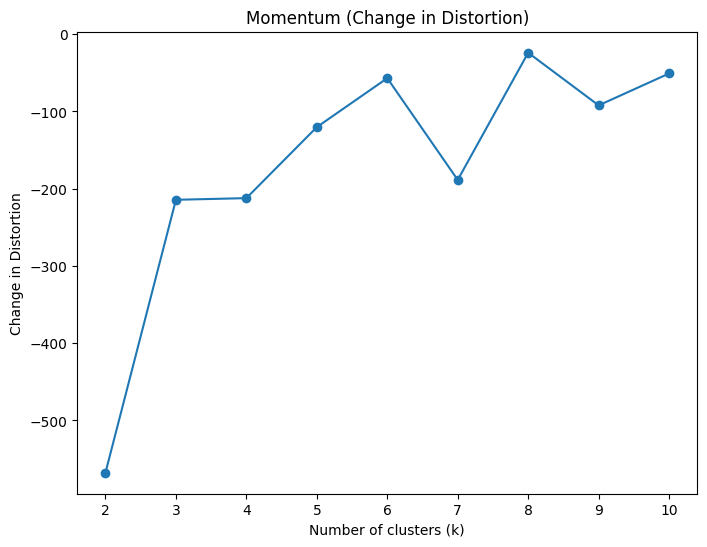

Optimal k based on Elbow Method: 2
Optimal k based on Momentum: 8
Selected optimal k: 2
Silhouette Score for k=2: 0.12012092329912172


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerics)

distortions = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

momentum = np.diff(distortions)

plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], momentum, marker='o')
plt.title('Momentum (Change in Distortion)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Change in Distortion')
plt.show()

distortion_change = np.diff(distortions)

optimal_k = np.argmin(distortion_change[1:]) + 2

optimal_k_momentum = np.argmax(momentum) + 2

print(f"Optimal k based on Elbow Method: {optimal_k}")
print(f"Optimal k based on Momentum: {optimal_k_momentum}")

optimal_k = optimal_k if distortion_change[optimal_k - 2] <= momentum[optimal_k_momentum - 2] else optimal_k_momentum
print(f"Selected optimal k: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

labels = kmeans.labels_

numerics['cluster'] = labels

sil_score = silhouette_score(data_scaled, labels)
print(f'Silhouette Score for k={optimal_k}: {sil_score}')


In [8]:
#characteristics and strategies


No numeric correlation data found for the target column.

Feature Importance (from Model):
                            Feature  Importance
6                        experience    0.379112
0                                id    0.076906
11                          remarks    0.076844
2                      purchase_sum    0.073708
4                    website_visits    0.070519
7                            active    0.069971
3                 attribution_score    0.053562
5   website_behavior_classification    0.052578
1                   purchase_counts    0.047803
10             characteristic_three    0.044990
9                characteristic_two    0.037643
8                characteristic_one    0.016363

Permutation Importance:
                            Feature  Permutation Importance
6                        experience                 0.75125
11                          remarks                 0.04250
1                   purchase_counts                 0.03875
0                  

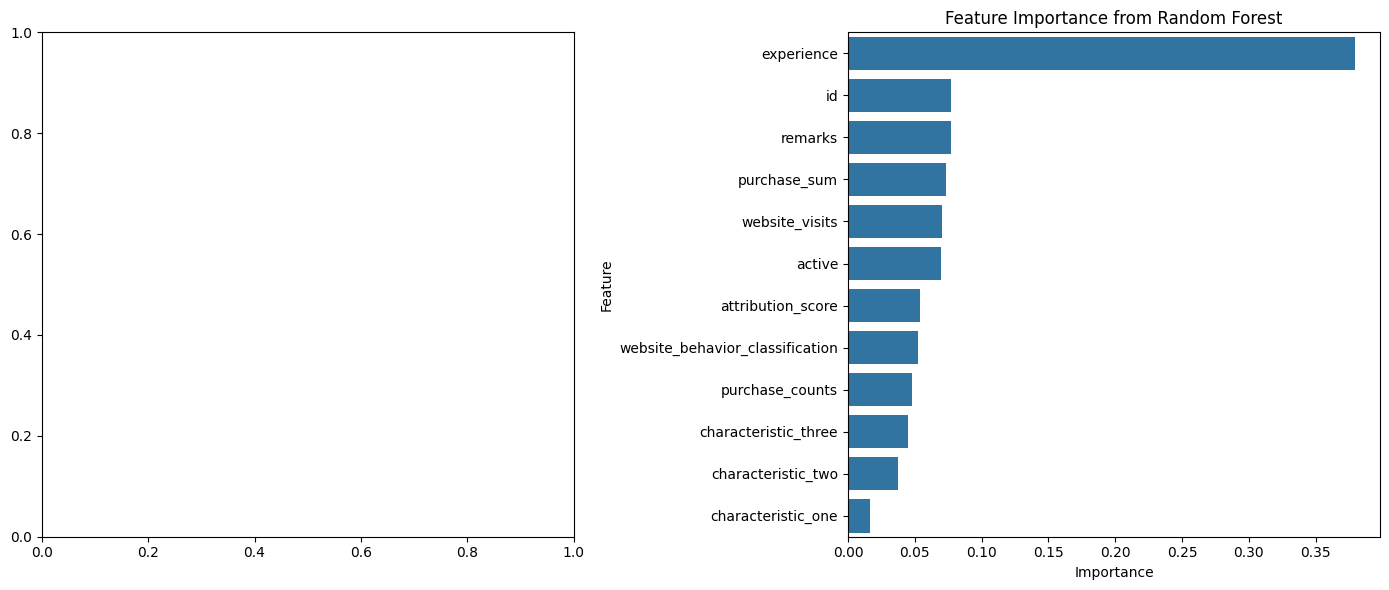

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

def feature_importance(df, target_column):

    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    if target_column not in df.columns:
        raise KeyError(f"Target column '{target_column}' not found in the DataFrame.")
    
    if X.select_dtypes(include=[object]).shape[1] > 0:
        for col in X.select_dtypes(include=[object]).columns:
            X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    
    if y.dtypes == 'object':
        y = LabelEncoder().fit_transform(y)

    numeric_X = X.select_dtypes(include=[np.number])
    if not numeric_X.empty:
        correlation_matrix = numeric_X.corr()
        if target_column in numeric_X.columns:
            feature_correlation = correlation_matrix[target_column].sort_values(ascending=False)
            print("\nCorrelation Coefficients with Target Column:")
            print(feature_correlation)
        else:
            print("\nNo numeric correlation data found for the target column.")
    else:
        print("\nNo numeric columns found for correlation matrix.")

    if y.nunique() <= 20:
        model = RandomForestClassifier(n_estimators=100)
    else:
        model = RandomForestRegressor(n_estimators=100)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    
    feature_importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance (from Model):")
    print(feature_importance_df)

    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    perm_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Permutation Importance': result.importances_mean
    }).sort_values(by='Permutation Importance', ascending=False)
    
    print("\nPermutation Importance:")
    print(perm_importance_df)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    if not numeric_X.empty and target_column in numeric_X.columns:
        sns.heatmap(correlation_matrix[target_column].to_frame().sort_values(by=target_column, ascending=False), annot=True, cmap='coolwarm', ax=axes[0])
        axes[0].set_title('Correlation with Target')
    else:
        print("\nNo valid numeric data for correlation heatmap.")

    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, ax=axes[1])
    axes[1].set_title('Feature Importance from Random Forest')
    
    plt.tight_layout()
    plt.show()

target_column = 'customer_journey_progress_program'
feature_importance(data, target_column)


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def plot_regression_and_correlations(data, target_column):
    numeric_data = data.select_dtypes(include=[np.number])

    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

    correlation_matrix = scaled_data.corr()
    target_correlations = correlation_matrix[target_column]
    
    print("Correlation Coefficients with Target Column (Post-Scaling):")
    print(target_correlations)
    
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(scaled_data.columns):
        if column != target_column:
            X = scaled_data[[column]]
            y = scaled_data[target_column]
            
            model = LinearRegression()
            model.fit(X, y)
            
            r2 = model.score(X, y)

            plt.subplot(2, len(scaled_data.columns)//2, i+1)
            sns.regplot(x=column, y=target_column, data=scaled_data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
            plt.title(f"Regression between {column} and {target_column}\nR² = {r2:.2f}")
    
    plt.tight_layout()
    plt.show()

    return target_correlations


Correlation Coefficients with Target Column (Post-Scaling):
purchase_counts                     -0.012585
purchase_sum                        -0.002640
attribution_score                   -0.025171
website_visits                      -0.039103
website_behavior_classification      0.090230
experience                           0.873334
active                               0.050226
characteristic_one                  -0.038408
characteristic_two                  -0.065153
characteristic_three                -0.018790
customer_journey_progress_program    1.000000
Name: customer_journey_progress_program, dtype: float64


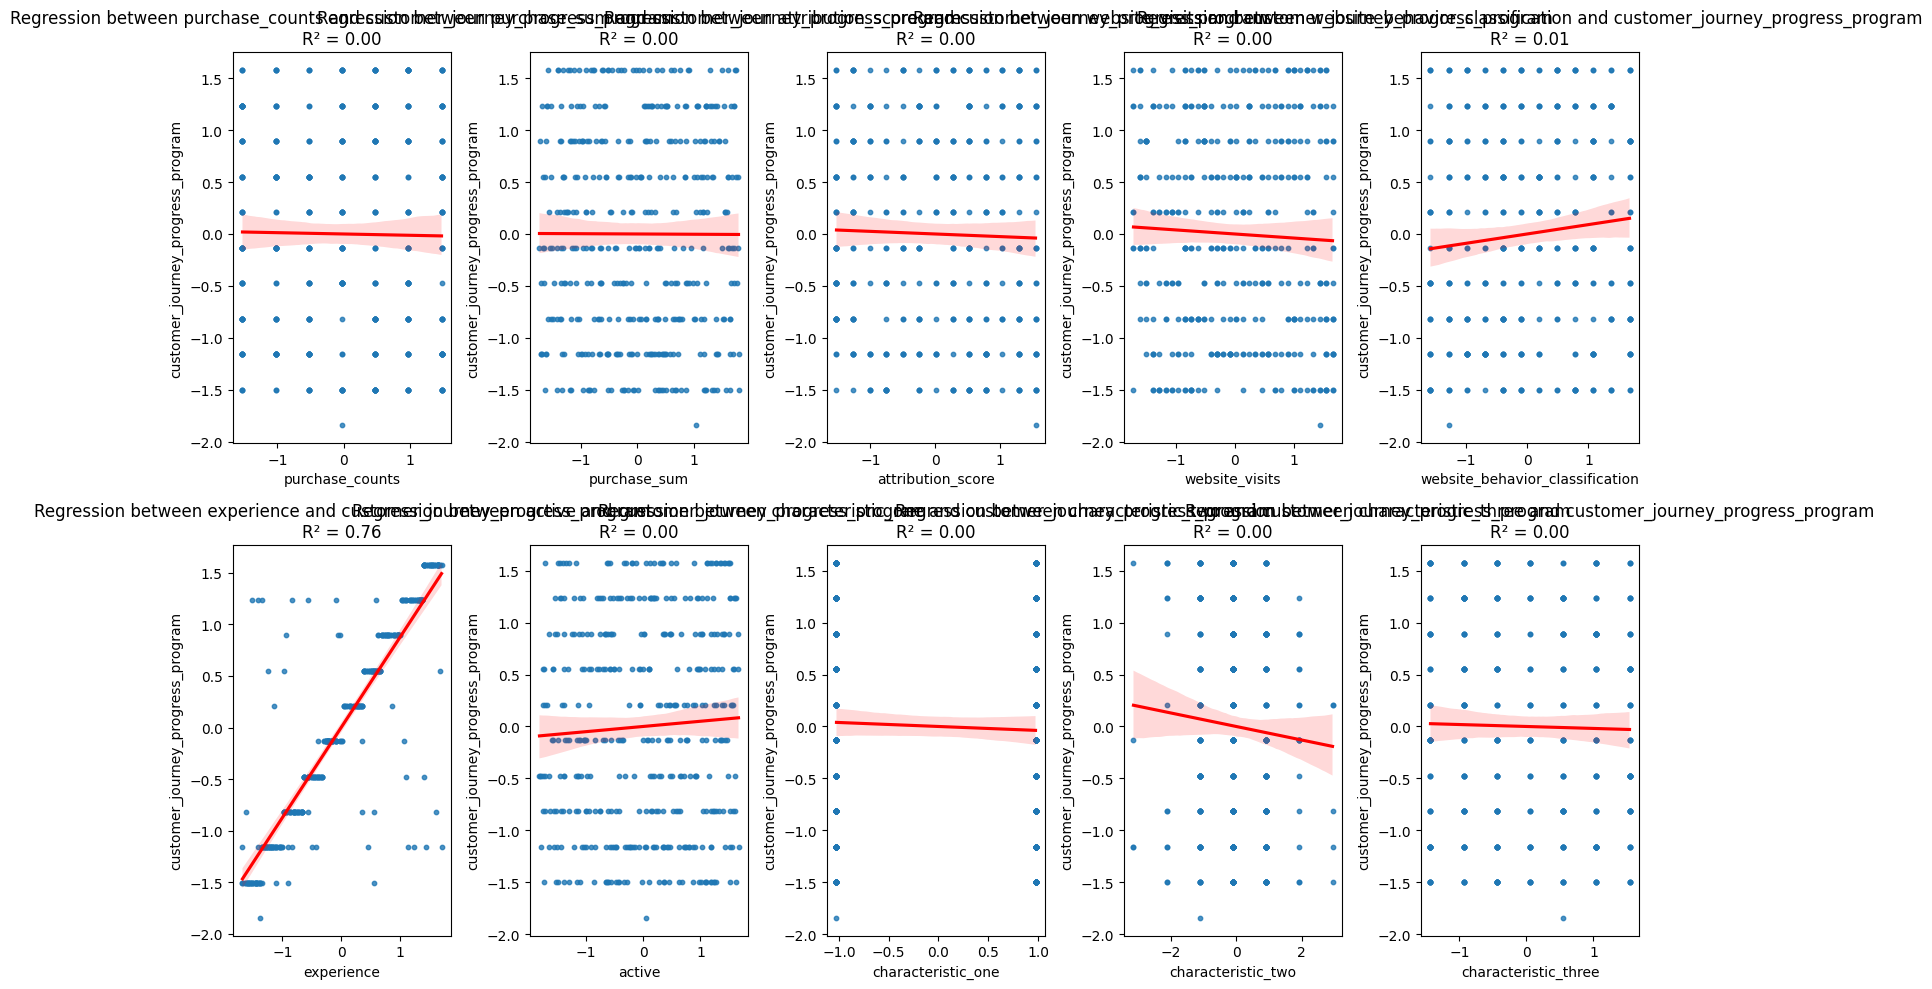

In [25]:
target_correlations = plot_regression_and_correlations(data, target_column)

In [26]:
print("")